## Exploratory Data Analysis using Pandas 



The data file used in this work can be downloaded from Kaggle website: https://www.kaggle.com/c/titanic/data, file `train.csv`. 
The main objective is to study exploratory data analysis using Pandas

**Question 1.**  _(4 points)_
* The answer to the main question - What categories of passengers were most likely to survive the Titanic disaster? _(2 points)_
* The detailed explanation of the logic of the analysis _(2 points)_

**Question 2.**  _(3 points)_
* What other attributes did you use for the analysis? Explain how you used them and why you decided to use them. 
* Provide a complete list of all attributes used.

**Question 3.**  _(3 points)_
* Did you engineer any attributes (created new attributes)? If yes, explain the rationale and how the new attributes were used in the analysis?
* If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded.

**Question 4.**  _(5 points)_
* How did you treat missing values for those attributes that you included in the analysis (for example, `age` attribute)? Provide a detailed explanation in the comments.


In [46]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
#Read the csv file
dframe = pd.read_csv('train.csv') 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
# Running info function to check more details on dataframe set
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [50]:
# drop the unwanted columns, such as, Ticket, Cabin, PassengerId,Parch:
dframe=dframe.drop(['Ticket','Cabin','PassengerId','Parch'], axis=1)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

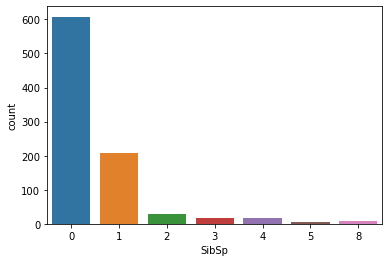

In [51]:
# Checking Sibling-Spouse count

dframe['SibSp'].value_counts()
sns.countplot(x='SibSp', data=dframe)

In [52]:
# Doing grouping based on Sibling-Spouse
dframe[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# Maximum people survived who were having 1 sib/spouse.

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [53]:
# 'Name' Attribute
titles = set()
for name in dframe['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
print(titles)


{'Ms', 'Major', 'Master', 'Miss', 'Sir', 'Mrs', 'Capt', 'Col', 'the Countess', 'Mme', 'Dr', 'Mlle', 'Jonkheer', 'Rev', 'Don', 'Lady', 'Mr'}


On checking the titles in Name attribute typo errors were found and to address that an additional attribute 'Title' was 
created by dropping 'Name' attribute. This will provide better information as compared to Name column

In [54]:
#Change the names to specific ones for categorizing them into a few
Title_Dictionary = {"Capt": "Officer","Col": "Officer","Major": "Officer","Jonkheer": "Royalty","Don": "Royalty","Sir" : "Royalty","Dr": "Officer","Rev": "Officer","the Countess":"Royalty","Mme": "Mrs","Mlle": "Miss","Ms": "Mrs","Mr" : "Mr","Mrs" : "Mrs","Miss" : "Miss","Master" : "Master","Lady" : "Royalty"}

In [55]:
#Use the map/lambda function of pandas
dframe['Title'] = dframe['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
dframe['Title'] = dframe.Title.map(Title_Dictionary)
dframe.drop('Name', axis=1, inplace=True)
dframe.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked,Title
0,0,3,male,22.0,1,7.2500,S,Mr
1,1,1,female,38.0,1,71.2833,C,Mrs
2,1,3,female,26.0,0,7.9250,S,Miss
3,1,1,female,35.0,1,53.1000,S,Mrs
4,0,3,male,35.0,0,8.0500,S,Mr


In [56]:
# Based on 'Title' engineered attribute we find that married females survived the most when compared with unmarried females 
# and children (among top 3 survival categories).

dframe[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.701087
2,Mr,0.156673
3,Mrs,0.795276
4,Officer,0.277778
5,Royalty,0.600000


In [57]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
 7   Title     891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [58]:
# transforming male, female categories to numeric form first
dframe.Sex=dframe.Sex.map({'female':0, 'male':1})

In [59]:
men_age_med=dframe[dframe['Sex']==1]['Age'].median()
women_age_med=dframe[dframe['Sex']==0]['Age'].median()

In [60]:
# filling null values in 'Age' with respective median age
dframe.loc[(dframe.Age.isnull()) & (dframe['Sex']==0),'Age']=women_age_med
dframe.loc[(dframe.Age.isnull()) & (dframe['Sex']==1),'Age']=men_age_med

In [61]:
# On running info function on our dataframe we cross verify that there is no null value against age
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
 7   Title     891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


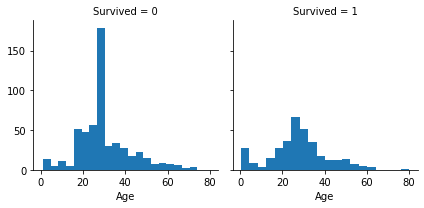

In [62]:
# Calculating the relationship of age group with number of survivals

g = sns.FacetGrid(dframe, col='Survived')
g.map(plt.hist, 'Age', bins=20)


In [64]:
# Checking count of Males and Females
dframe['Sex'].value_counts()
# Count of Females = 314 and Males = 577 as per running the above command

1    577
0    314
Name: Sex, dtype: int64

In [65]:
# Let's add a new feature named Died
dframe['Died'] = 1 - dframe['Survived']

In [66]:
dframe.groupby('Sex').agg('sum')[['Survived', 'Died']]

,Survived,Died
Sex,,
0,233,81
1,109,468


In [67]:
# We know total count of people is 891 as per info details. Therefore, finding out the %age of male and female that died
# We have already calculated the total count of males and females and now utilizing it for calculating %ages
Male_total = 577
Female_total = 314
Male_survived= 109
Female_survived= 233
Total_survived = Male_survived + Female_survived
Total_people = Male_total + Female_total

Female_survival_perc = (Female_survived/Female_total)* 100
Male_survival_perc = (Male_survived/Male_total)*100
Total_survival_perc = (Total_survived/Total_people)*100

In [68]:
Survival_perc_sex = {'Female_survival_perc':Female_survival_perc, 'Male_survival_perc':Male_survival_perc, 'Total_survival_perc':Total_survival_perc }
Survival_perc_sex

{'Female_survival_perc': 74.20382165605095,
 'Male_survival_perc': 18.890814558058924,
 'Total_survival_perc': 38.38383838383838}

In [69]:
# Clearly survival percentage of Females was more than males counterpart

In [70]:
# Now trying to find out the survival percentage based on Class of ticket bought

Class_survival = dframe.groupby('Pclass').sum()[['Survived', 'Died']]
dframe.groupby('Pclass').sum()[['Survived', 'Died']]

,Survived,Died
Pclass,,
1,136,80
2,87,97
3,119,372


In [71]:
Class_1_total = Class_survival.iloc[0,0] + Class_survival.iloc[0,1]
Class_2_total = Class_survival.iloc[1,0] + Class_survival.iloc[1,1]
Class_3_total = Class_survival.iloc[2,0] + Class_survival.iloc[2,1]


Class_1_survival = Class_survival.iloc[0,0]
Class_2_survival = Class_survival.iloc[1,0]
Class_3_survival = Class_survival.iloc[2,0]

In [72]:
Class_1_survival_perc = (Class_1_survival/Class_1_total)*100
Class_2_survival_perc = (Class_2_survival/Class_2_total)*100
Class_3_survival_perc = (Class_3_survival/Class_3_total)*100

In [73]:
Survival_perc_class = {'Class_1_survival_perc':Class_1_survival_perc, 'Class_2_survival_perc':Class_2_survival_perc, 'Class_3_survival_perc':Class_3_survival_perc}
Survival_perc_class

{'Class_1_survival_perc': 62.96296296296296,
 'Class_2_survival_perc': 47.28260869565217,
 'Class_3_survival_perc': 24.236252545824847}

In [74]:
# The data indicates that Pclass 1 survival rate was maximum from all the classes

In [75]:
# Another way of calculating the percentage survival for Pclass
Pclass_survived_count = dframe[dframe['Survived']==1].groupby('Pclass').count()['Survived']
Pclass_count = dframe.groupby('Pclass').count()['Survived']
Perc_Pclass_survived_count = (Pclass_survived_count/Pclass_count)*100
Perc_Pclass_survived_count

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [76]:
# Calculating Survival Based on Fare of ticket

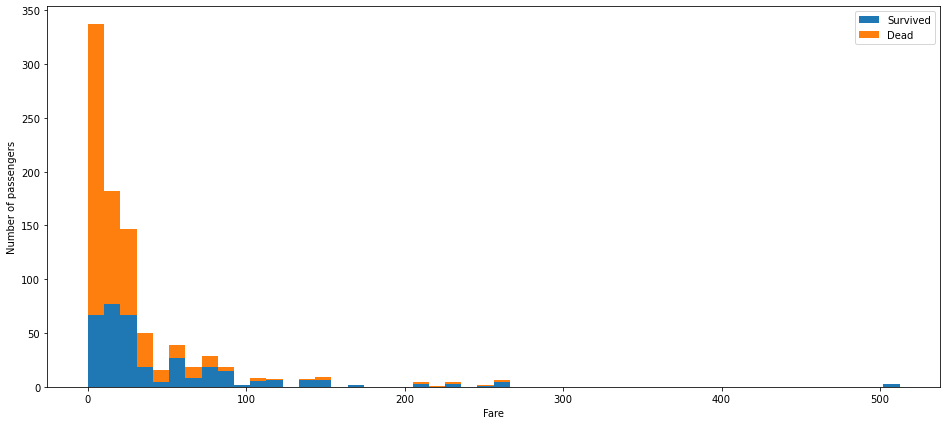

In [77]:
figure = plt.figure(figsize=(16, 7))
plt.hist([dframe[dframe['Survived'] == 1]['Fare'], dframe[dframe['Survived'] == 0]['Fare']], 
         stacked=True, bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

In [78]:
# Clearly blue color against Orange color clearly states that passengers with higher ticket price survived the most

In [79]:
# Now, checking data and doing analysis based on Embarked attribute
dframe[dframe.Embarked.isna()]
# So we have two passenger for whom we don't have the details of Embarked and for the time-being these values can be dropped

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked,Title,Died
61,1,1,0,38.0,0,80.0,NaN,Miss,0
829,1,1,0,62.0,0,80.0,NaN,Mrs,0


In [80]:
dframe.dropna(subset=['Embarked'], inplace = True)


In [81]:
# Calculating the percentage survival based on Embark attribute
Embarked_survived_count = dframe[dframe['Survived']==1].groupby('Embarked').count()['Survived']
Embarked_count = dframe.groupby('Embarked').count()['Survived']
Perc_Embarked_survived_count = (Embarked_survived_count/Embarked_count)*100
Perc_Embarked_survived_count

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64

In [82]:
# The passengers travelling to destination C survived the most

Results

The final analysis includes:

A cleaned and preprocessed dataset.

Visualizations that illustrate key patterns and insights.

Observations and hypotheses for further modeling or investigation.